# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

NOMES:
* ALUNO 1: Douglas Nery Barbosa

Este _notebook_ é correspondente ao nosso primeiro projeto, passado no dia 22/08/2024 e para entrega no dia 19/09/2024. Ele consiste em questões teóricas e questões práticas. A entrega da atividade deve ser feita através do Google Classroom, fazendo um _upload_ deste _notebook_, devidamente atualizado com as suas resoluções e implementações. Recomendo fortemente que façam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente e que eu conseguir executar o código de vocês sem dificuldades.

A resolução das questões teóricas pode ser feita de duas formas:
* Escrita em $\LaTeX$ aqui no próprio Google Colab
* Escrita à mão, escaneada de modo legível, e feito o upload no Google Classroom.

A primeira alternativa é mais recomendada, por deixar o trabalho mais organizado, e cá entre nós, estar tudo em um documento só me facilita a correção! :-) mas para quem não tem fluência com $\LaTeX$ ou prefere fazer à mão, a segunda alternativa está aí. Obviamente que não haverá punição nenhuma meramente por conta da escolha de sua preferência.

O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito.

## Parte prática

### 1) Regressão linear múltipla

Resolva o exercício 9 da Sec. 3.7 do Cap. 3 de [ITSL].

In [ ]:
#pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 997.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=b9377d7970e34dda18d4753cf8369b2fba67c122cb38272ada0c240d75bf9dc8
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from pandas.plotting import scatter_matrix
from ISLP import load_data
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
auto_data = load_data('Auto')
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


**A) Produce a scatterplot matrix which includes all of the variables
in the data set.**


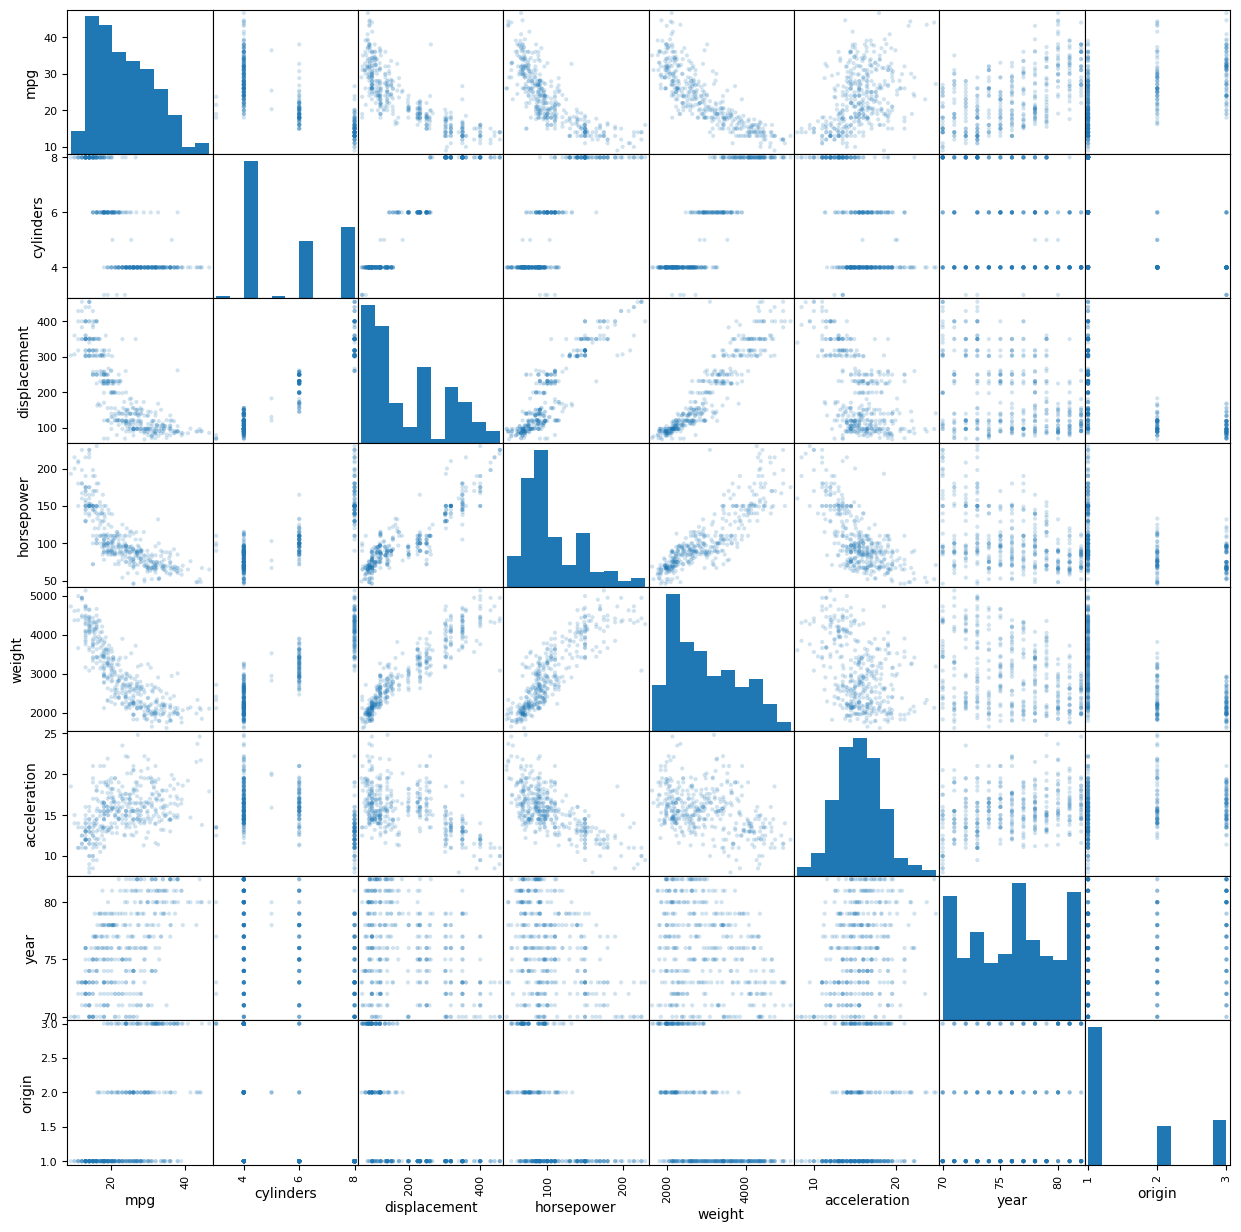

In [ ]:
# Criar a scatterplot matrix
scatter_matrix(auto_data, alpha=0.2, figsize=(15, 15), diagonal='hist')

# Mostrar o gráfico
plt.show()

**B) Compute the matrix of correlations between the variables using
the DataFrame.corr() method.**

In [ ]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000



**C) Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:**
- **i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to
answer this question.**
- **ii. Which predictors appear to have a statistically signifcant
relationship to the response?**
- **iii. What does the coefcient for the year variable suggest?**

In [ ]:
X = auto_data.drop(columns=['mpg'])
y = auto_data['mpg']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.04e-139
Time:                        18:25:46   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [ ]:
formula = 'mpg ~ ' + ' + '.join([col for col in auto_data.columns if col != 'mpg' and col != 'name'])
model = ols(formula, data=auto_data).fit()
# (i) Analisar a relação entre preditores e resposta usando ANOVA
anova_results = anova_lm(model)
print(anova_results)

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


#### Respostas

**i e ii) Analisando essa tabela é possível verificar que a variável "acceleration" não é tão significativa para a regressão. Ou seja, a variável "acceleration" não explica significativamente o "mpg". Isso ocorre porque a seu p-valor está alto.
Já as variáveis year, cylinders, weight, displacement, e horsepower são importantes para o modelo.**

**iii) O coeficiente para variável year sugere que o consumo de combustível dos carros a medida que o tempo avança tende a melhorar.**

### 2) Seleção de variáveis

Resolva o exercício 10 da Sec. 6.6 do Cap. 6 de [ITSL]. Explique o que é o *best subset selection*, invocado no item c).

Obs.: Esse exercício é parecido com o que fizemos em uma aula prática, porém ele tem algumas perguntinhas adicionais. Para fazê-lo, você precisará ver o que é o *best subset selection*, que é apresentado na pág. 231. Claro, use o código que desenvolvemos em sala de aula como ponto de partida para a geração dos dados sintéticos.

In [ ]:
carseats_data = load_data('Carseats')
carseats_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
modelo = sm.OLS.from_formula('Sales ~ Price + Urban + US', data=carseats_data)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           2.39e-23
Time:                        01:21:13   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

## Parte teórica

### 3) Regularização em regressão linear - soluções analíticas

No vídeo em anexo nessa atividade nós encontramos a solução analítica do problema de regressão linear através da minimização da seguinte função, em relação à variável $\boldsymbol{\beta}$: $$\|\mathbf{X}\boldsymbol{\beta} - \mathbf{y}\|^2,$$
onde $\mathbf{X}$ é uma matriz de tamanho $n \times p$ contendo os atributos observados ($n$ é a quantidade de observações e $p$ é a quantidade de atributos do modelo), $\boldsymbol{\beta}$ é um vetor de tamanho $p \times 1$ contendo os coeficientes da regressão e $\mathbf{y}$ é um vetor de tamanho $n \times 1$ contendo as respostas observadas. Para simplificar, note que **não** estamos levando em conta o intercepto no problema de regressão, de modo que **todas** as colunas de $\mathbf{X}$ representam atributos observados. Em particular, a primeira coluna da matriz $\mathbf{X}$ **não** é necessariamente preenchida com $1$'s.

O objetivo dessa questão é estudar o que acontece com a solução analítica do Lasso e da regressão Ridge. Para simplificar, assuma que a matriz $\mathbf{X}$ têm colunas ortonormais, de modo que $\mathbf{X}^T\mathbf{X} = \mathbf{I}_p$, onde $\mathbf{I}_p$ é a matriz identidade de tamanho $p \times p$. Com base nisso, faça o que se pede abaixo.

*   a) Encontre a solução analítica da regressão Ridge, minimizando em relação à variável $\boldsymbol{\beta}$ a função: $$\|\mathbf{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_2^2.$$ A mesma estratégia que fizemos em sala para a regressão sem penalização funciona aqui. Note que como não estamos considerando o intercepto na regressão, **todas** as entradas de $\boldsymbol{\beta}$ são penalizadas.

[Resolução da questão 3a](https://drive.google.com/file/d/1aaR2ulqYgukGrl4NxVMbUy28kJeDCNy9/view?usp=sharing)

*   b) Encontre a solução analítica da regressão Lasso, minimizando em relação à variável $\boldsymbol{\beta}$ a função: $$\|\mathbf{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_1.$$ Note que como a penalização não é uma função derivável, o procedimento usado no item a) pode não funcionar, de modo que outra alternativa deve ser buscada.

-- sua resolução aqui --

*   c) À luz do que foi reportado nos itens anteriores, compare as soluções analíticas da regressão linear sem penalização, com penalização Ridge e com penalização Lasso.

A regressão linear simples busca encontrar os coeficientes 𝛽 que minimizam a perda quadrática entre as previsões do modelo e os valores reais de 𝑦. No entanto, uma limitação da regressão linear simples é a possibilidade de overfitting, o que pode causar problemas na previsão de valores fora do intervalo em que o modelo foi treinado.

Por outro lado, a regressão Ridge inclui uma penalização que aproxima os coeficientes 𝛽 de zero, mas não os zera completamente. Isso ajuda a reduzir a influência excessiva de alguns coeficientes no modelo.

A regressão Lasso também tem o objetivo de diminuir a influência de certos coeficientes no modelo, mas, além disso, pode forçar alguns coeficientes a serem exatamente zero. Isso promove uma forma de seleção de variáveis, onde apenas os coeficientes mais relevantes são mantidos no modelo.

*   d) Estude o *help* das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet` no `scikit-learn` e reporte que problemas de otimização eles resolvem. Eles são idênticos aos que você resolveu aqui na teoria ou são diferentes? Caso sejam diferentes, tente justificar a diferença observada.

- LinearRegression: Resolve o problema de regressão linear sem penalização.

- Ridge: Resolve o problema de regressão com penalização 𝐿2, o que corresponde a encolher os coeficientes ajudando a controlar a colinearidade e o overfitting.

- Lasso: Resolve o problema de regressão com penalização 𝐿1, o que é consistente em selecionar coeficientes mais relevantes, zerando alguns outros coeficientes.

- ElasticNet: Resolve o problema de regressão com uma combinação de penalizações 𝐿1 e 𝐿2 é uma extensão das penalizações Lasso e Ridge. É uma combinação entre as duas que regula conforme a necessidade de acordo com os valores para penalização.

...

### 4) Relacionando "encontrar o melhor preditor" com "estimando bem a função de regressão"

Em sala de aula fizemos uma prova parcial (seguida da interpretação) do teorema apresentado como "Teorema 1" na Seção 1.4 de [AME] (pág. 10). Prove rigorosamente esse resultado.

Obs.: Note que a prova apresentada em [AME] é bastante sucinta, e não fica tão claro em relação a quem estão sendo tomadas as esperanças. Deixe isso claro na sua demonstração.

[Resolução da questão 4](https://drive.google.com/file/d/1akYQIr_05XW5-HUIDkJ4oP4VFhohQdbk/view?usp=sharing)

### 5) O balanço entre viés e variância (questão bônus)

O objetivo dessa questão é tornar rigorosa e provar a equação do balanço entre viés e variância. Para isso, siga os passos indicados abaixo.

Obs.: Cristopher Bishop em "Pattern Recognition and Machine Learning", Sec. 3.2 (pág. 147) dá alguns vagos indícios de como fazer essa conta.

Obs².: Eu sei que essa questão é "emocionante". Me lembro que demorei um bom tempo até conseguir desmembrar a conta e chegar nesse passo-a-passo. Qualquer dificuldade, não hesitem em perguntar!

a) Assuma que a relação entre $Y \in \mathbb{R}$ e $\mathbf{X} \in \mathbb{R}^p$ é dada por $Y = f(\mathbf{X}) + \varepsilon$, onde a função $f: \mathbb{R}^p \to \mathbb{R}$ é desconhecida e $\varepsilon$ é um erro de média zero, independente de $\mathbf{X}$. Denote por $\hat{f}$ uma estimativa de $f$ e assuma que $\mathbf{X}$ e $Y$ sigam uma distribuição conjunta cuja densidade é dada por $p(\mathbf{x}, y)$. Mostre que a "melhor" possível estimativa (no sentido de minimizar a função custo quadrática) é dada por $\hat{f}_{\mathrm{opt}}(\mathbf{x}) = \mathbb{E}_Y[Y | \mathbf{X} = \mathbf{x}]$. Para isso, mostre que o seguinte valor esperado é mínimo quando $\hat{f} = \hat{f}_{\mathrm{opt}}$: $$\mathbb{E}_{\mathbf{X}, Y}[(\hat{f}(\mathbf{X}) - Y)^2] = \iint (\hat{f}(\mathbf{x}) - y)^2 p(\mathbf{x}, y)~d\mathbf{x}dy$$

[Resolução da questão 5a](https://drive.google.com/file/d/1bNpo1JVK4-776QkQSvxUEgEky4NS8FR4/view?usp=sharing)

b) Seja agora $\hat{f}$ uma estimativa de $f$ obtida a partir de um determinado conjunto de observações $\mathcal{D}$. Explicitemos tal fato agora escrevendo $\hat{f}(\mathbf{x})$ como $\hat{f}(\mathbf{x}; \mathcal{D})$. Fixe $\mathbf{x}$ e considere a distância quadrática entre $\hat{y} = \hat{f}(\mathbf{x}; \mathcal{D})$ e sua "melhor" previsão possível, ou seja, $(\hat{f}(\mathbf{x}; \mathcal{D}) - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2$. Mostre que o valor esperado de tal quantidade com respeito a todos os possívels conjuntos de dados é dada por

$$\mathbb{E}_{\mathcal{D}}[(\hat{f}(\mathbf{x}; \mathcal{D}) - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2] = (\mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})] - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2 - \mathbb{E}_{\mathcal{D}}[(\hat{f}(\mathbf{x}; \mathcal{D}) - \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})])^2].$$

Dica: $0 = \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})] - \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})]$.

Finalmente, argumente que o primeiro desses termos é o que chamamos de "viés" (ao quadrado) e o segundo de "variância".

-- Escreva aqui a sua resolução --

c) Note que o resultado obtido acima é quase o que queremos, a menos do termo sobre a variância do erro de observação. De modo a incorporá-lo, retorne ao item a) e mostre que $\mathbb{E}_{\mathbf{X}, Y}[(\hat{f}(\mathbf{X}) - Y)^2]$ pode ser escrita como $$\mathbb{E}_{\mathbf{X}, Y}[(\hat{f}(\mathbf{X}) - Y)^2] = \int (\hat{f}(\mathbf{x}) - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2 p(\mathbf{x})~d\mathbf{x} + \iint (\hat{f}_{\mathrm{opt}}(\mathbf{x}) - y)^2 p(\mathbf{x}, y)~d\mathbf{x}dy.$$

Dica: Novamente, $0 = \mathrm{alguma~coisa} - \mathrm{a~mesma~coisa}$. Descubra quem é essa coisa.

-- Escreva aqui a sua resolução --

d) Juntando os resultados dos itens b) e c), conclua que

$$\mathbb{E}_{\mathbf{X}, Y, \mathcal{D}}[(\hat{f}(\mathbf{X}; \mathcal{D}) - Y)^2] = \int (\mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})] - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2 p(\mathbf{x})~d\mathbf{x} + \int \mathbb{E}_{\mathcal{D}}[(\hat{f}(\mathbf{x}; \mathcal{D}) - \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})])^2] p(\mathbf{x})~d\mathbf{x} + \iint (\hat{f}_{\mathrm{opt}}(\mathbf{x}) - y)^2 p(\mathbf{x}, y)~d\mathbf{x}dy.$$

Para concluir, argumente que o primeiro desses termos é o que chamamos de "viés" (ao quadrado), segundo é a "variância" e o terceiro está relacionado com o ruído inerente das observações.

-- Escreva aqui a sua resolução --